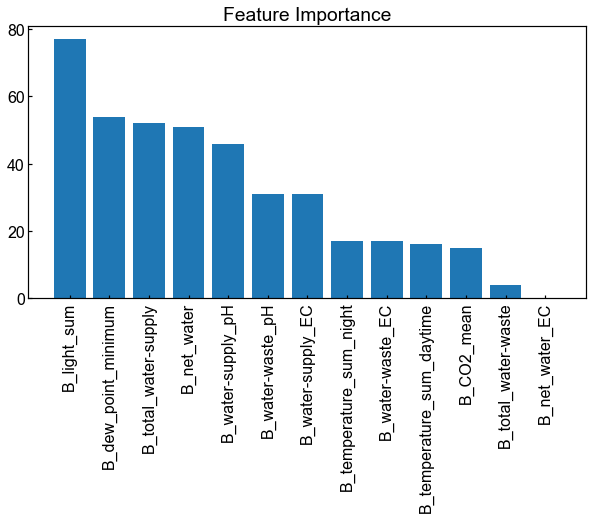

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.3


def plot_sorted_bar(figsize: tuple, x: list, y: np.array, xticks_rotation: str=False, title: str=None) -> None:
    """
    入力値を降順ソートして棒グラフを作成するメソッド

    Parameters
    ----------
    figsize : tuple
        figsizeのtuple
    x : list
        横軸(ラベル)
    y : np.numpy
        縦軸(数値)
    xticks_rotation : bool
        ラベル方向
    title : str
        グラフタイトル文字列

    """
    # yを昇順ソート後、逆順にindexを取得
    sorted_index = np.argsort(y)[::-1]
    # 棒グラフの可視化
    plt.figure(figsize=figsize)
    plt.bar(
        #ラベルが数値だと自動ソートされるため、x軸は文字列型にしておく
        x[sorted_index].astype("str"),
        np.sort(y)[::-1]
    )
    if title is not None:
        plt.title(title)
    if xticks_rotation:
        plt.xticks(rotation=90)
        
    plt.savefig("result/bar_plot.png", dpi=100, bbox_inches="tight")
        

if __name__ == "__main__":
    df = pd.read_csv("../../modeling/length/variable_selection_length_ranked.csv")
    df_variable = df.iloc[:, 1:-1]
    frequency = np.sum(df_variable, axis=0)
    index = frequency.index

    # 可視化
    plot_sorted_bar(
        figsize=(10, 5),
        x=index, 
        y=frequency,
        xticks_rotation=True,
        title="Feature Importance"
    )